<a href="https://colab.research.google.com/github/Angelogallardo05/Assignment01/blob/main/Copy_of_Data_608_Story_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Angel Gallardo




Data 608 Story 4


**How much do we get paid?**




This analysis will use the BLS Occupational Employment and Wage Statistics dataset to examine average salary variations for a "Data Practitioner".


Source: https://www.bls.gov/oes/tables.htm

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
data = pd.read_excel('/content/all_data_M_2023.xlsx')

In [3]:
data.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,23.11,37.01,58.4,29050,35660,48060,76980,121470,NaN,NaN
1,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,56.19,81.29,111.36,54550,78330,116880,169090,231620,NaN,NaN
2,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,49.74,79.57,#,46400,66170,103460,165500,#,NaN,NaN
3,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,99.37,#,#,80000,130840,206680,#,#,NaN,NaN
4,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,99.37,#,#,80000,130840,206680,#,#,NaN,NaN


In [4]:
data['A_MEDIAN'] = pd.to_numeric(data['A_MEDIAN'], errors='coerce')

In [5]:
roles = ['Data Scientists', 'Database Administrators', 'Computer and Information Research Scientists', 'Operations Research Analysts', 'Database Architects']
filtered_data = data[data['OCC_TITLE'].isin(roles)]

In [6]:
state_salary = filtered_data.groupby(['PRIM_STATE', 'OCC_TITLE'])['A_MEDIAN'].mean().reset_index()

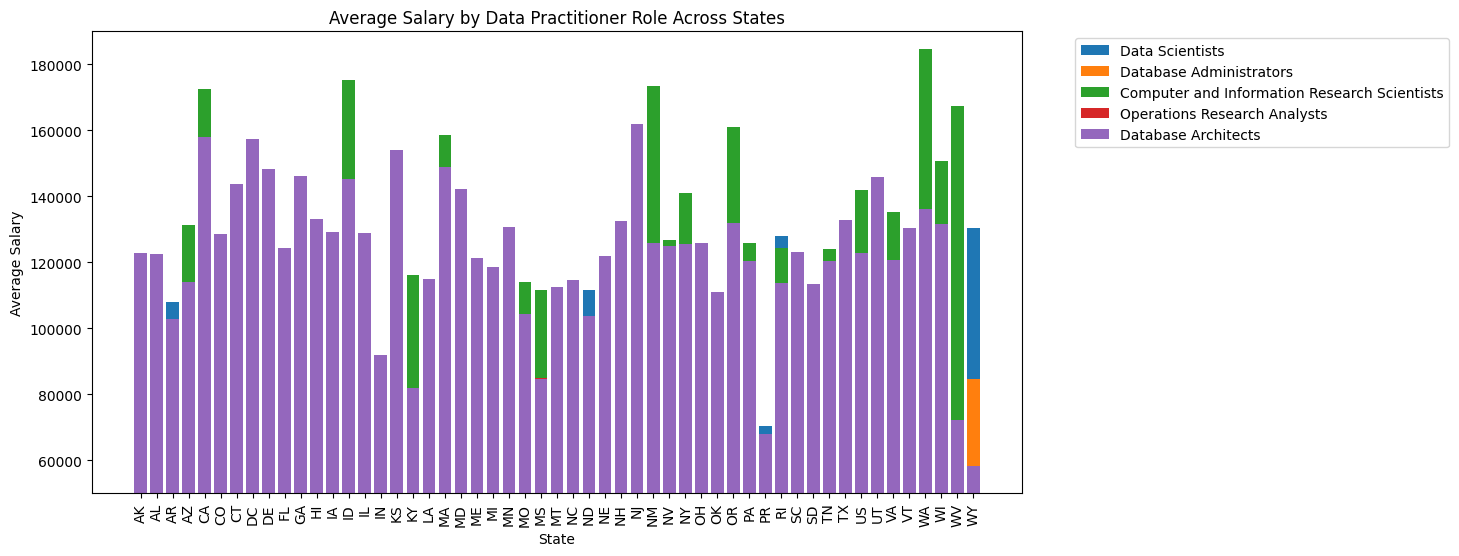

In [12]:
plt.figure(figsize=(12, 6))
for role in roles:
    role_data = state_salary[state_salary['OCC_TITLE'] == role]
    plt.bar(role_data['PRIM_STATE'], role_data['A_MEDIAN'], label=role)

plt.title('Average Salary by Data Practitioner Role Across States')
plt.xlabel('State')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.ylim(50000, 190000)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


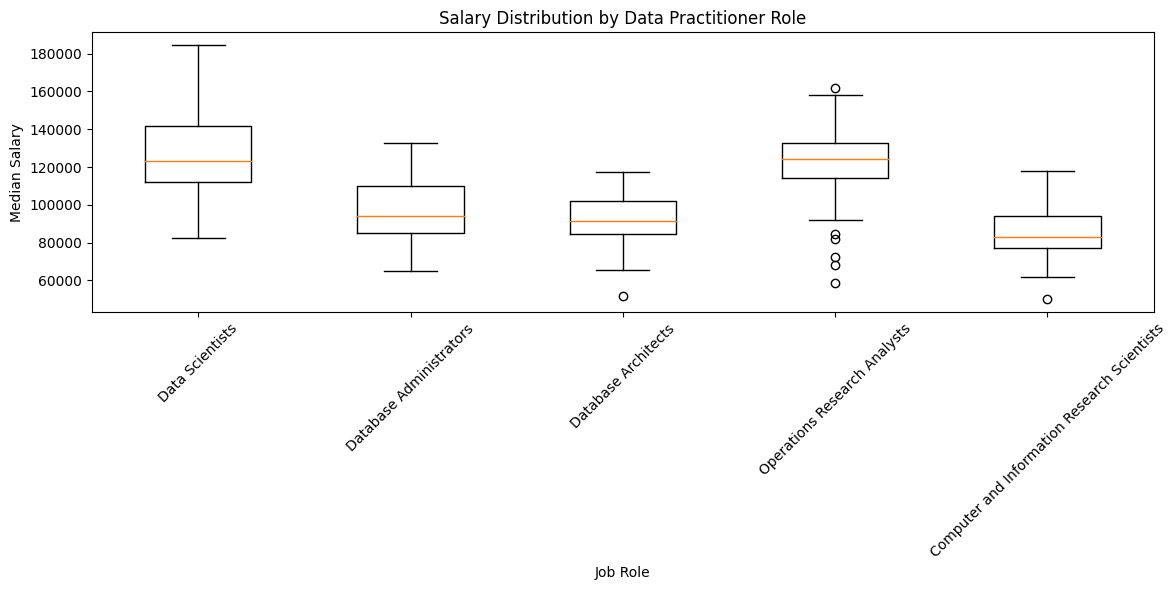

In [15]:


grouped_data = [group['A_MEDIAN'].values for name, group in state_salary.groupby('OCC_TITLE')]


plt.figure(figsize=(12, 6))


plt.boxplot(grouped_data, labels=state_salary['OCC_TITLE'].unique())


plt.title('Salary Distribution by Data Practitioner Role')
plt.xlabel('Job Role')
plt.ylabel('Median Salary')


plt.xticks(rotation=45)


plt.tight_layout()

The two graphs present analysis of salary distributions for various data practitioner roles across different states in the U.S. The first graph shows the average salary by role across states, where the dominant role, Database Architects, tends to earn the highest salary consistently across most states, peaking at around 170,000 in New Jersey. In some states, Data Scientist and Computer Information Research Scientists were paid significantly more. The second graph, a box plot, highlights the median salary distribution across different data practitioner roles. It shows that Data Scientists earn the highest median salary, reaching up to 180,000. Data Research analyst follow closely, with a median salary slightly over 120,000. The spread of salaries within each role and the presence of outliers suggests variations depending on experience, location, and industry demands.